# 01. Import libraries and create path

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'/Users/andrea/Desktop/Happiness'

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Import 2015 dataset

In [4]:
# import 2015 data
df15 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_2015.csv'), index_col = False)

# 03. Clean 2015 dataset

In [5]:
df15.head()

Unnamed: 0 Country or region  Happiness Rank  Happiness Score  Economy  \
0           0       Switzerland               1            7.587  1.39651   
1           1           Iceland               2            7.561  1.30232   
2           2           Denmark               3            7.527  1.32548   
3           3            Norway               4            7.522  1.45900   
4           4            Canada               5            7.427  1.32629   

    Family   Health  Freedom    Trust  Generosity  
0  1.34951  0.94143  0.66557  0.41978     0.29678  
1  1.40223  0.94784  0.62877  0.14145     0.43630  
2  1.36058  0.87464  0.64938  0.48357     0.34139  
3  1.33095  0.88521  0.66973  0.36503     0.34699  
4  1.32261  0.90563  0.63297  0.32957     0.45811

In [6]:
# drop Unnamed: 0 column
df15 = df15.drop(columns = ['Unnamed: 0'])

In [7]:
df15.shape

(158, 9)

In [8]:
df15.columns

Index(['Country or region', 'Happiness Rank', 'Happiness Score', 'Economy',
       'Family', 'Health', 'Freedom', 'Trust', 'Generosity'],
      dtype='object')

In [9]:
# check for missing values
df15.isnull().sum()

Country or region    0
Happiness Rank       0
Happiness Score      0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
dtype: int64

In [10]:
# check for duplicates
dups = df15.duplicated()

In [11]:
dups.shape

(158,)

<Axes: xlabel='Happiness Score', ylabel='Count'>

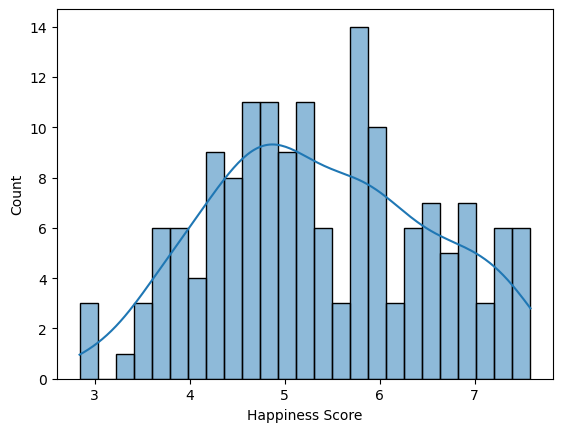

In [12]:
# extreme value checks
sns.histplot(df15['Happiness Score'], bins=25, kde = True)

In [13]:
# check the mean
df15['Happiness Score'].mean()

5.375734177215189

In [14]:
# check the median
df15['Happiness Score'].median()

5.2325

In [15]:
# check the max
df15['Happiness Score'].max()

7.587

# 04. 2015 data prep for regression analysis

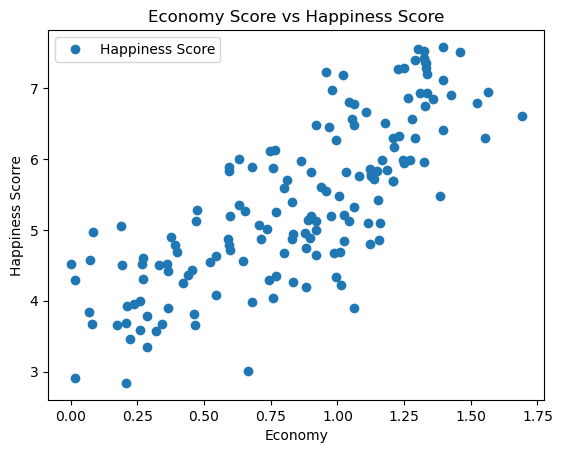

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df15.plot(x = 'Economy', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Economy Score vs Happiness Score')  
plt.xlabel('Economy')  
plt.ylabel('Happiness Scorre')  
plt.show()

Hypothesis: If more individuals feel happy with the economy, then the Happiness Score of the country they are from will be higher. 

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df15['Economy'].values.reshape(-1,1)
y = df15['Happiness Score'].values.reshape(-1,1)

In [18]:
X

array([[1.39651],
       [1.30232],
       [1.32548],
       [1.459  ],
       [1.32629],
       [1.29025],
       [1.32944],
       [1.33171],
       [1.25018],
       [1.33358],
       [1.22857],
       [0.95578],
       [1.33723],
       [1.02054],
       [1.39451],
       [0.98124],
       [1.56391],
       [1.33596],
       [1.30782],
       [1.42727],
       [1.26637],
       [1.36011],
       [1.04424],
       [1.52186],
       [1.06353],
       [1.32792],
       [1.10715],
       [1.69042],
       [1.27778],
       [1.05351],
       [1.17898],
       [1.06166],
       [0.91861],
       [0.9669 ],
       [1.39541],
       [1.23011],
       [1.2074 ],
       [1.29098],
       [1.55422],
       [0.99534],
       [1.21183],
       [0.76454],
       [0.74553],
       [0.63244],
       [1.16891],
       [1.27074],
       [1.24461],
       [0.86402],
       [1.32376],
       [1.25114],
       [0.68133],
       [0.59448],
       [0.75985],
       [1.12254],
       [1.18498],
       [1.

In [19]:
y

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.853],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 05. 2015 regression analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

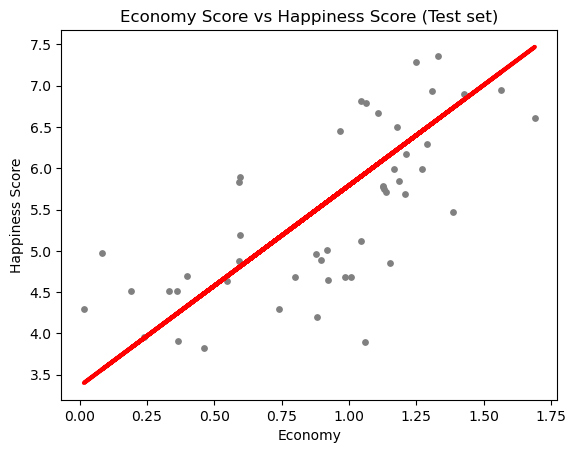

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Economy Score vs Happiness Score (Test set)')
plot_test.xlabel('Economy')
plot_test.ylabel('Happiness Score')
plot_test.show()

As a first interpretation, I can see that the linear model represented by the red regression line does not perfectly cover all of the data points. There are many data points above and below the line, with barely any data points having actual contact with the line. 

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.43123401]]
Mean squared error:  0.5843373388848639
R2 score:  0.4035799527921242


In [27]:
y_predicted

array([[6.59790598],
       [6.20210108],
       [4.68663999],
       [4.23537864],
       [6.12607639],
       [4.16309806],
       [3.8239166 ],
       [3.94141814],
       [5.8128362 ],
       [5.59332009],
       [5.94589764],
       [4.24755913],
       [6.05194807],
       [6.09500522],
       [4.807837  ],
       [5.53706133],
       [5.16393985],
       [4.79624002],
       [5.93789888],
       [4.80253691],
       [6.44967364],
       [5.7109675 ],
       [6.09668277],
       [6.39968747],
       [6.30644964],
       [6.49888182],
       [6.16599726],
       [6.8302347 ],
       [4.47949885],
       [4.32669579],
       [4.80552733],
       [6.24117101],
       [7.16243851],
       [3.39920433],
       [5.50406949],
       [5.89899914],
       [3.56219426],
       [6.29745408],
       [5.59813393],
       [5.49645972],
       [7.47001393],
       [5.75616414],
       [5.3029335 ],
       [5.89707846],
       [6.5398238 ],
       [6.11102706],
       [6.22658361],
       [6.729

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data15 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data15.head(30)

Actual  Predicted
0    7.364   6.597906
1    5.995   6.202101
2    4.633   4.686640
3    4.514   4.235379
4    5.716   6.126076
5    4.507   4.163098
6    4.512   3.823917
7    3.956   3.941418
8    4.686   5.812836
9    5.007   5.593320
10   6.786   5.945898
11   3.904   4.247559
12   6.670   6.051948
13   5.770   6.095005
14   5.194   4.807837
15   4.885   5.537061
16   4.297   5.163940
17   4.876   4.796240
18   3.896   5.937899
19   5.828   4.802537
20   5.987   6.449674
21   6.455   5.710967
22   5.791   6.096683
23   7.286   6.399687
24   6.168   6.306450
25   6.298   6.498882
26   4.857   6.165997
27   6.901   6.830235
28   3.819   4.479499
29   4.694   4.326696

The model's summary statistics are:
Slope: [[2.43123401]]
Mean squared error:  0.5843373388848639
R2 score:  0.4035799527921242

Here we have a positive relationship. As the score for the economy factor rises, the overall happiness score also rises. While this does prove the hypothesis, it does not actually tell how well the model performed. 

The mean squared error in this case is a pretty small number. A small MSE means that the regression line passes faily close to the observations. This means it is a good fit. 

The R2 score tells you how well the model explains the variance of the data. When looking at the above R2 score of 0.4035, it can be viewed as 40 percent out of 100 percent. 40 percent is not that great, meaning the model is not that great of a fit. 

Also, when looking at the actual and predicted y values, you can see there is a difference in the numbers. This information adds to the fact that the model is not a great fit for explaining the relationship between economy and happiness score.

This data is based on human decisions, which always contain bias. These types of biases can be difficult to identify and eliminate. 

# 06. Import 2019 dataset

In [30]:
# import 2019 data
df19 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_2019.csv'), index_col = False)

# 07. Clean 2019 dataset

In [31]:
df19.head()

Unnamed: 0  Happiness Rank Country or region  Happiness Score  Economy  \
0           0               1           Finland            7.769    1.340   
1           1               2           Denmark            7.600    1.383   
2           2               3            Norway            7.554    1.488   
3           3               4           Iceland            7.494    1.380   
4           4               5       Netherlands            7.488    1.396   

   Family  Health  Freedom  Generosity  Trust  
0   1.587   0.986    0.596       0.153  0.393  
1   1.573   0.996    0.592       0.252  0.410  
2   1.582   1.028    0.603       0.271  0.341  
3   1.624   1.026    0.591       0.354  0.118  
4   1.522   0.999    0.557       0.322  0.298

In [33]:
# drop Unnamed: 0 column
df19 = df19.drop(columns = ['Unnamed: 0'])

In [34]:
df19.shape

(156, 9)

In [35]:
df19.columns

Index(['Happiness Rank', 'Country or region', 'Happiness Score', 'Economy',
       'Family', 'Health', 'Freedom', 'Generosity', 'Trust'],
      dtype='object')

In [36]:
# check for missing values
df19.isnull().sum()

Happiness Rank       0
Country or region    0
Happiness Score      0
Economy              0
Family               0
Health               0
Freedom              0
Generosity           0
Trust                0
dtype: int64

In [38]:
# check for duplicates
dups2 = df19.duplicated()

In [40]:
dups2.shape

(156,)

<Axes: xlabel='Happiness Score', ylabel='Count'>

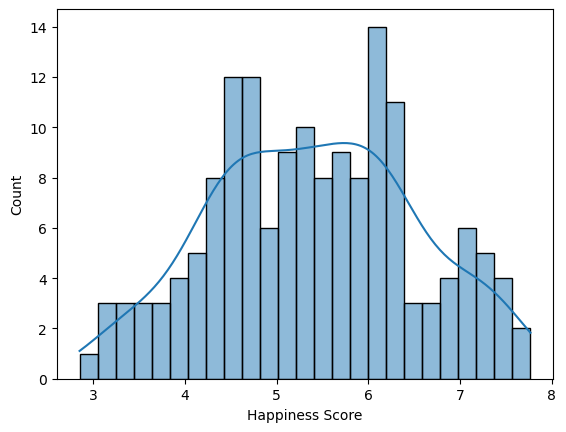

In [42]:
# extreme value checks
sns.histplot(df19['Happiness Score'], bins=25, kde = True)

In [43]:
# check the mean
df19['Happiness Score'].mean()

5.407096153846155

In [44]:
# check the median
df19['Happiness Score'].median()

5.3795

In [45]:
# check the max
df19['Happiness Score'].max()

7.769

# 08. 2019 data prep for regression analysis

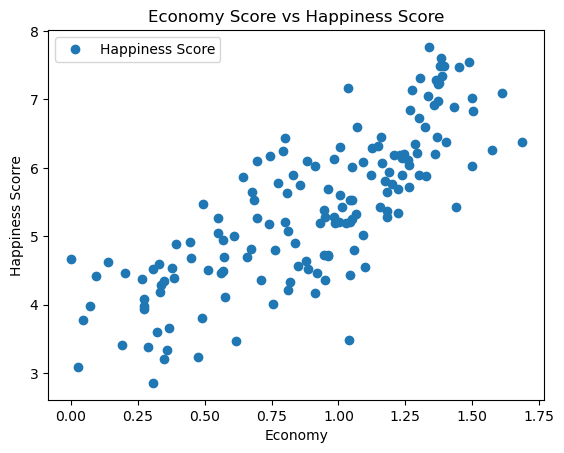

In [46]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df19.plot(x = 'Economy', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Economy Score vs Happiness Score')  
plt.xlabel('Economy')  
plt.ylabel('Happiness Scorre')  
plt.show()

Hypothesis: If more individuals feel happy with the economy, then the Happiness Score of the country they are from will be higher.

In [47]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = df19['Economy'].values.reshape(-1,1)
y2 = df19['Happiness Score'].values.reshape(-1,1)

In [48]:
X2

array([[1.34 ],
       [1.383],
       [1.488],
       [1.38 ],
       [1.396],
       [1.452],
       [1.387],
       [1.303],
       [1.365],
       [1.376],
       [1.372],
       [1.034],
       [1.276],
       [1.609],
       [1.333],
       [1.499],
       [1.373],
       [1.356],
       [1.433],
       [1.269],
       [1.503],
       [1.3  ],
       [1.07 ],
       [1.324],
       [1.368],
       [1.159],
       [0.8  ],
       [1.403],
       [1.684],
       [1.286],
       [1.149],
       [1.004],
       [1.124],
       [1.572],
       [0.794],
       [1.294],
       [1.362],
       [1.246],
       [1.231],
       [1.206],
       [0.745],
       [1.238],
       [0.985],
       [1.258],
       [0.694],
       [0.882],
       [1.092],
       [1.162],
       [1.263],
       [0.912],
       [1.5  ],
       [1.05 ],
       [1.187],
       [1.301],
       [1.237],
       [0.831],
       [1.12 ],
       [1.327],
       [0.642],
       [1.173],
       [0.776],
       [1.201],
       [

In [49]:
y2

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

In [51]:
# Split data into a training set and a test set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

# 09. 2019 regression analysis

In [52]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [54]:
# Fit the regression object onto the training set.

regression.fit(X2_train, y2_train)

LinearRegression()

In [55]:
# Predict the values of y using X.

y2_predicted = regression.predict(X2_test)

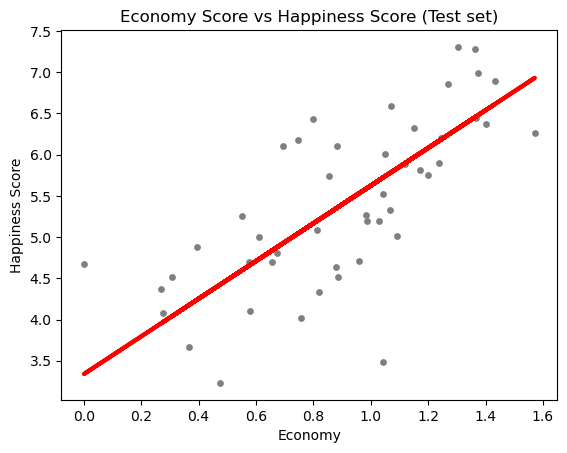

In [56]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('Economy Score vs Happiness Score (Test set)')
plot_test.xlabel('Economy')
plot_test.ylabel('Happiness Score')
plot_test.show()

As a first interpretation, I can see that the linear model represented by the red regression line does not perfectly cover all of the data points. There are many data points above and below the line, with barely any data points having actual contact with the line.

In [57]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y2_test, y2_predicted) # This is the mean squared error
r2 = r2_score(y2_test, y2_predicted) # This is the R2 score. 

In [58]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.28560657]]
Mean squared error:  0.5168179896793245
R2 score:  0.49218256470476307


In [59]:
y2_predicted

array([[5.16746232],
       [6.16627239],
       [6.18684285],
       [5.34802524],
       [6.46568686],
       [6.31712243],
       [5.35488206],
       [5.53315938],
       [4.66005767],
       [5.04175396],
       [5.59487075],
       [5.73886397],
       [4.65091524],
       [4.04294389],
       [5.89885643],
       [5.71829351],
       [6.9319506 ],
       [5.36402449],
       [4.92518803],
       [3.95151963],
       [4.17550907],
       [6.45883004],
       [5.06461003],
       [6.01999357],
       [3.33897707],
       [4.4269258 ],
       [4.59834629],
       [5.29317069],
       [5.58572833],
       [5.19717521],
       [6.47711489],
       [6.23941181],
       [5.21317446],
       [4.73548268],
       [5.7845761 ],
       [5.77771928],
       [4.23722045],
       [4.87719029],
       [5.69086623],
       [6.54568309],
       [4.84062058],
       [3.96751888],
       [5.83485944],
       [6.61425128],
       [6.08399056],
       [5.96513902],
       [5.72515033]])

In [60]:
# Create a dataframe comparing the actual and predicted values of y.

data19 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data19.head(30)

Actual  Predicted
0    6.436   5.167462
1    5.893   6.166272
2    6.198   6.186843
3    4.639   5.348025
4    6.446   6.465687
5    7.307   6.317122
6    6.100   5.354882
7    4.707   5.533159
8    4.107   4.660058
9    6.174   5.041754
10   5.197   5.594871
11   6.008   5.738864
12   4.700   4.650915
13   4.516   4.042944
14   5.888   5.898856
15   3.488   5.718294
16   6.262   6.931951
17   4.519   5.364024
18   6.105   4.925188
19   4.374   3.951520
20   3.663   4.175509
21   7.278   6.458830
22   4.015   5.064610
23   5.809   6.019994
24   4.668   3.338977
25   3.231   4.426926
26   5.261   4.598346
27   5.743   5.293171
28   5.274   5.585728
29   5.082   5.197175

The model's summary statistics are: 
Slope: [[2.28560657]]
Mean squared error:  0.5168179896793245
R2 score:  0.49218256470476307

Here we have a positive relationship. As the score for the economy factor rises, the overall happiness score also rises. While this does prove the hypothesis, it does not actually tell how well the model performed.

The mean squared error in this case is a pretty small number. A small MSE means that the regression line passes faily close to the observations. This means it is a good fit.

The R2 score tells you how well the model explains the variance of the data. When looking at the above R2 score of 0.4921, it can be viewed as 49 percent out of 100 percent. 49 percent is not that great, meaning the model is not that great of a fit.

Also, when looking at the actual and predicted y values, you can see there is a difference in the numbers. This information adds to the fact that the model is not a great fit for explaining the relationship between economy and happiness score.

This data is based on human decisions, which always contain bias. These types of biases can be difficult to identify and eliminate.